In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv("P1_Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
for column in df.columns:
    print(f'column {column} has values: {df[column].unique()}')

column RowNumber has values: [    1     2     3 ...  9998  9999 10000]
column CustomerId has values: [15634602 15647311 15619304 ... 15584532 15682355 15628319]
column Surname has values: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
column CreditScore has values: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 54

In [7]:
df=pd.get_dummies(df,columns=['Geography'])

In [8]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'].astype(str)) # Male=1, Female=0

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True


## Data Visualization

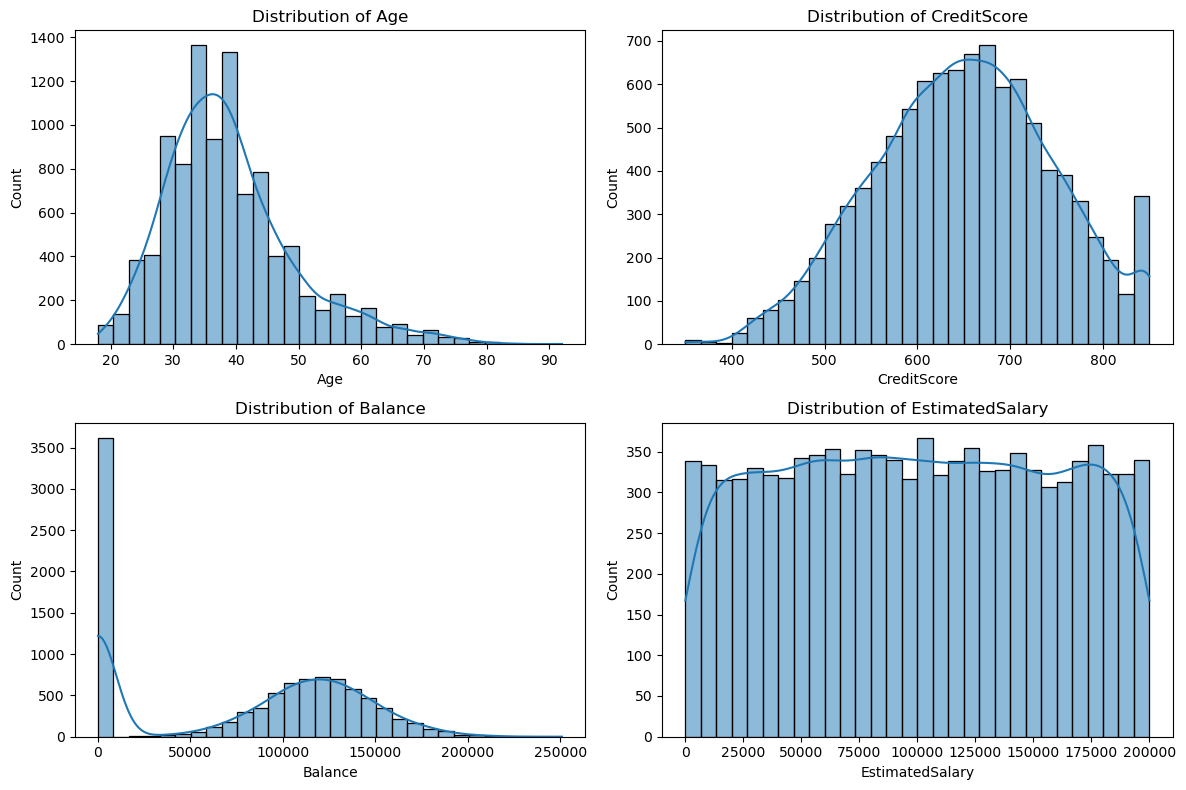

In [11]:
# Distribution of numerical features 
# Histogram 
# List of numerical features
num_features = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']

# Create histograms with KDE for each numerical feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_20328\3238113202.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Gender'], palette="pastel")


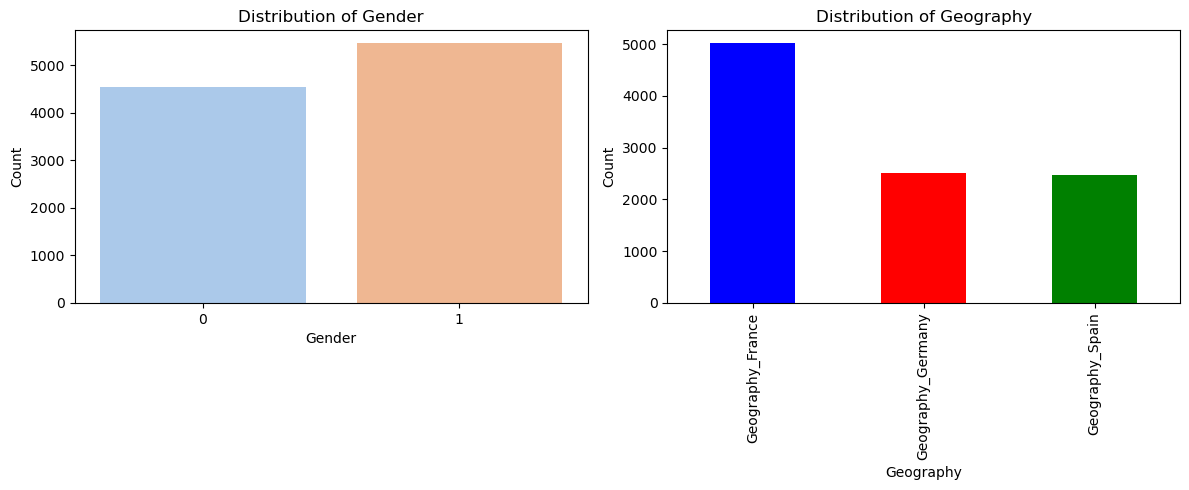

In [12]:
#Categorical feature distributions
#Bar Plots
plt.figure(figsize=(12, 5))

# Plot Gender Distribution
plt.subplot(1, 2, 1)
sns.countplot(x=df['Gender'], palette="pastel")
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

# Plot Geography Distribution
plt.subplot(1, 2, 2)
df[['Geography_France', 'Geography_Germany', 'Geography_Spain']].sum().plot(kind='bar', color=['blue', 'red', 'green'])
plt.title("Distribution of Geography")
plt.xlabel("Geography")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


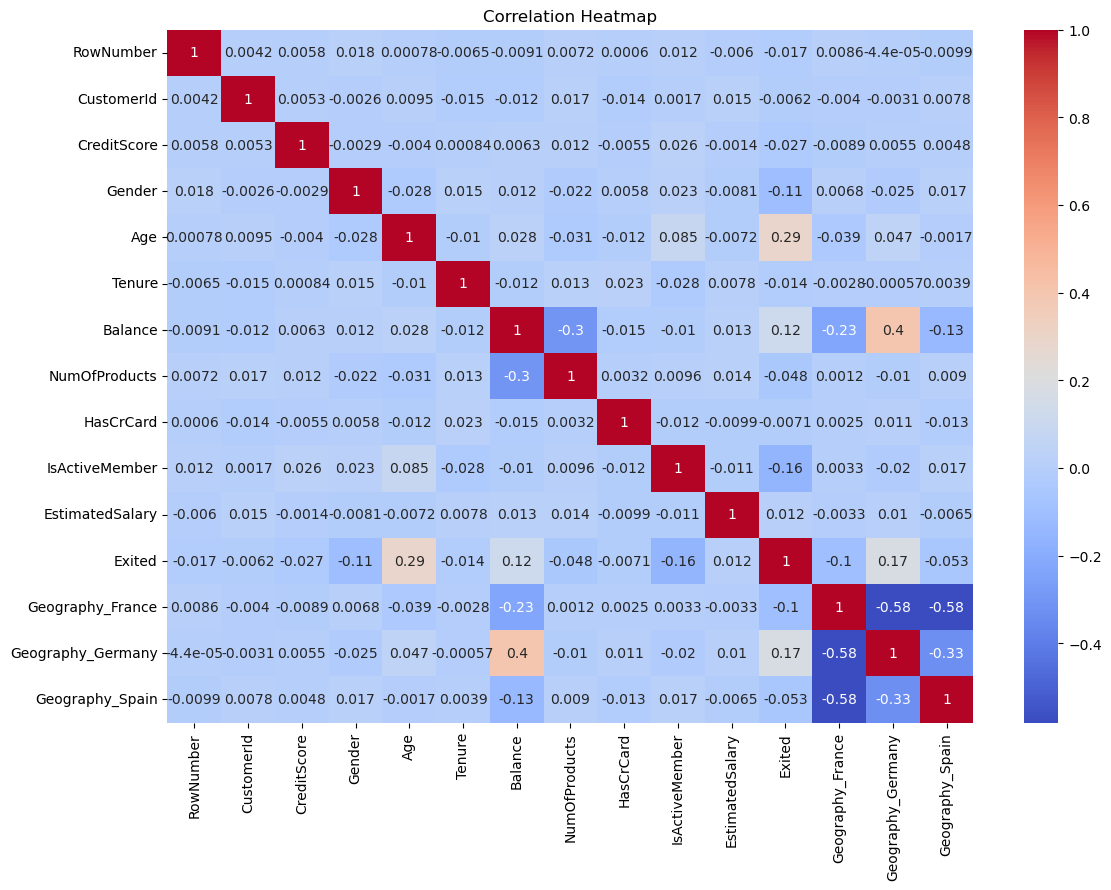

In [13]:
# Correlation heatmap
# Drop 'Surname' when calculating correlations
correlation_matrix = df.drop(columns=['Surname']).corr()

plt.figure(figsize=(13, 9))

sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_20328\2153275006.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Exited'], palette="pastel")


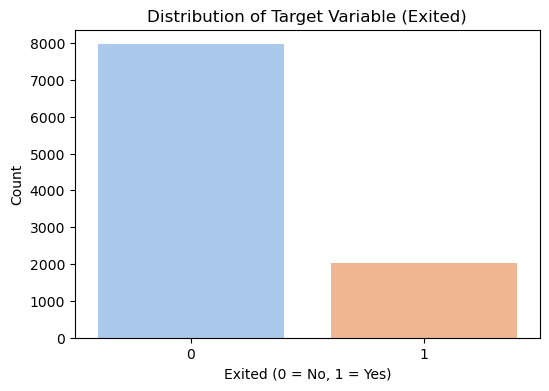

In [14]:
# Distribution of the Target Variable (Exited)
#Bar Plot (Count Plot)
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Exited'], palette="pastel")
plt.title("Distribution of Target Variable (Exited)")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [15]:
# Drop irrelevant columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [16]:
# Split dataset into features (X) and target (y)
X = df.drop(columns=['Exited'])  
y = df['Exited']

In [17]:
# Split into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
# Standardize numerical features (important for KNN & SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Evaluation

## K-Nearest Neighbors (KNN) 

In [59]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Optimize KNN with More Granular Hyperparameter Tuning
param_grid = {
    'n_neighbors': range(1, 30, 2),  # More precise range of neighbors
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'p': [1, 2, 3],  # Adding p=3 for generalized Minkowski
    
}

gridsearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, verbose=2)
gridsearch.fit(X_train_scaled, y_train)
print(gridsearch.best_params_)

# Train KNN with the best parameters
best_knn = KNeighborsClassifier(**gridsearch.best_params_)
best_knn.fit(X_train_scaled, y_train)

# Make predictions
predict = best_knn.predict(X_test_scaled)
predict_proba = best_knn.predict_proba(X_test_scaled)[:,1]

# Evaluate the model
KNN_Accuracy = best_knn.score(X_test_scaled, y_test)
print(f'Optimized KNN Accuracy: {KNN_Accuracy}')

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
{'metric': 'euclidean', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Optimized KNN Accuracy: 0.837


In [60]:
from sklearn import metrics
KNN_Precision = metrics.precision_score(y_test, predict,average='weighted')
print(KNN_Precision)

0.8252404827823439


In [61]:
KNN_F1_score = metrics.f1_score(y_test,predict,average='weighted')
print(KNN_F1_score)

0.8079099483402383


In [62]:
KNN_Sensitivity_recall = metrics.recall_score(y_test,predict,average='weighted')
print(KNN_Sensitivity_recall)

0.837


In [63]:
KNN_roc_auc = roc_auc_score(y_test,predict_proba, average='weighted', multi_class='ovr')
print(f'ROC-AUC Score: {KNN_roc_auc}')

ROC-AUC Score: 0.8008609534033263


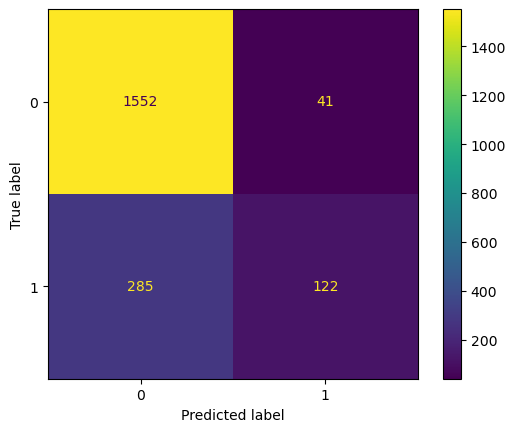

In [53]:
from sklearn import metrics
y_test = np.array(y_test) 
predict = np.array(predict)
confusion_matrix = metrics.confusion_matrix(y_test, predict)
classes = np.unique(y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                            display_labels=classes)
cm_display.plot()
plt.show()

## Naive Bayes 

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


# Define Naïve Bayes Model
nb_model = GaussianNB()

# Define hyperparameters to tune (var_smoothing is useful for stability)
param_grid = {'var_smoothing': np.logspace(-9, 0, 10)}

gridsearch = GridSearchCV(nb_model, param_grid, cv=5, n_jobs=-1, verbose=2)
gridsearch.fit(X_train_scaled, y_train)
print(gridsearch.best_params_)

# Train Naïve Bayes with the best parameters
best_nb = GaussianNB(**gridsearch.best_params_)
best_nb.fit(X_train_scaled, y_train)

# Make predictions
predict = best_nb.predict(X_test_scaled)
predict_proba = best_nb.predict_proba(X_test_scaled)[:,1]

# Evaluate the model
nb_Accuracy = accuracy_score(y_test, predict)
print(f'Optimized Naïve Bayes Accuracy: {nb_Accuracy}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'var_smoothing': 0.1}
Optimized Naïve Bayes Accuracy: 0.8165


In [73]:
from sklearn import metrics
nb_Precision = metrics.precision_score(y_test, predict,average='weighted')
print(nb_Precision)

0.7933895340778584


In [75]:
nb_Sensitivity_recall = metrics.recall_score(y_test,predict,average='weighted')
print(nb_Sensitivity_recall)

0.8165


In [77]:
nb_F1_score = metrics.f1_score(y_test,predict,average='weighted')
print(nb_F1_score)

0.7955172233857098


In [79]:
nb_roc_auc = roc_auc_score(y_test,predict_proba, average='weighted', multi_class='ovr')
print(f'ROC-AUC Score: {nb_roc_auc}')

ROC-AUC Score: 0.7766564715717258


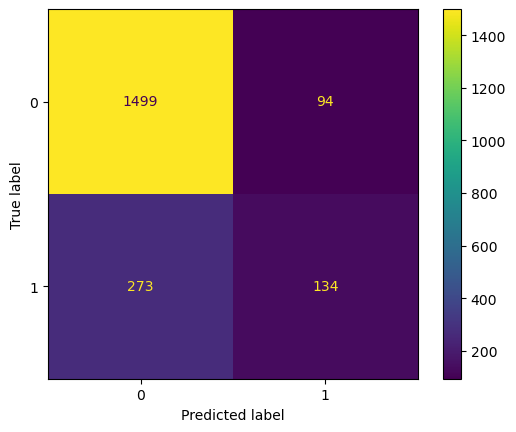

In [81]:
from sklearn import metrics
y_test = np.array(y_test) 
predict = np.array(predict)
confusion_matrix = metrics.confusion_matrix(y_test, predict)
classes = np.unique(y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                            display_labels=classes)
cm_display.plot()
plt.show()

## Support Vector Machine (SVM) 

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Define SVM Model
svm_model = SVC()

# Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
}

gridsearch = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1, verbose=2)
gridsearch.fit(X_train_scaled, y_train)

# Train SVM with the best parameters
best_svm = SVC(probability=True,**gridsearch.best_params_)
best_svm.fit(X_train_scaled, y_train)

# Make predictions
predict = best_svm.predict(X_test_scaled)
predict_proba = best_svm.predict_proba(X_test_scaled)[:,1]

# Evaluate the model
SVM_Accuracy = accuracy_score(y_test, predict)
print(f'Optimized SVM Accuracy: {SVM_Accuracy}')


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Optimized SVM Accuracy: 0.8605


In [96]:
from sklearn import metrics
SVM_Precision = metrics.precision_score(y_test, predict,average='weighted')
print(SVM_Precision)

0.8496661082052959


In [98]:
SVM_Sensitivity_recall = metrics.recall_score(y_test,predict,average='weighted')
print(SVM_Sensitivity_recall)

0.8605


In [100]:
SVM_F1_score = metrics.f1_score(y_test,predict,average='weighted')
print(SVM_F1_score)

0.8481836966693238


In [102]:
SVM_roc_auc = roc_auc_score(y_test,predict_proba, average='weighted', multi_class='ovr')
print(f'ROC-AUC Score: {SVM_roc_auc}')

ROC-AUC Score: 0.8270274292970798


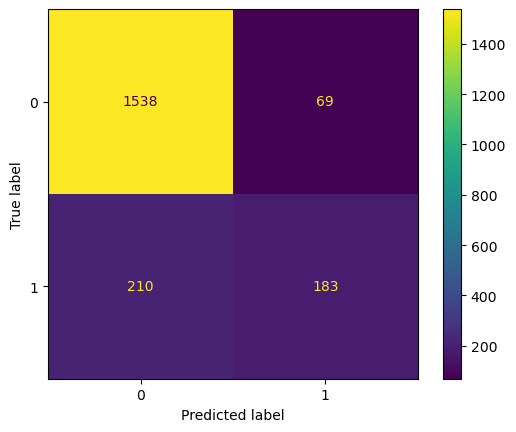

In [104]:
from sklearn import metrics
y_test = np.array(y_test) 
predict = np.array(predict)
confusion_matrix = metrics.confusion_matrix(y_test, predict)
classes = np.unique(y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                            display_labels=classes)
cm_display.plot()
plt.show()

## Decision Tree

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search=GridSearchCV(estimator=dt,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train_scaled,y_train)

model=DecisionTreeClassifier(random_state=42,**grid_search.best_params_)
model.fit(X_train_scaled, y_train)

predict=model.predict(X_test_scaled)
predict_proba=model.predict_proba(X_test_scaled)[:,1]

# Evaluate the model
dt_Accuracy = model.score(X_test_scaled, y_test)
print(f'Accuracy: {dt_Accuracy}')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Accuracy: 0.8435


In [141]:
selected_features= ['CreditScore', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain']

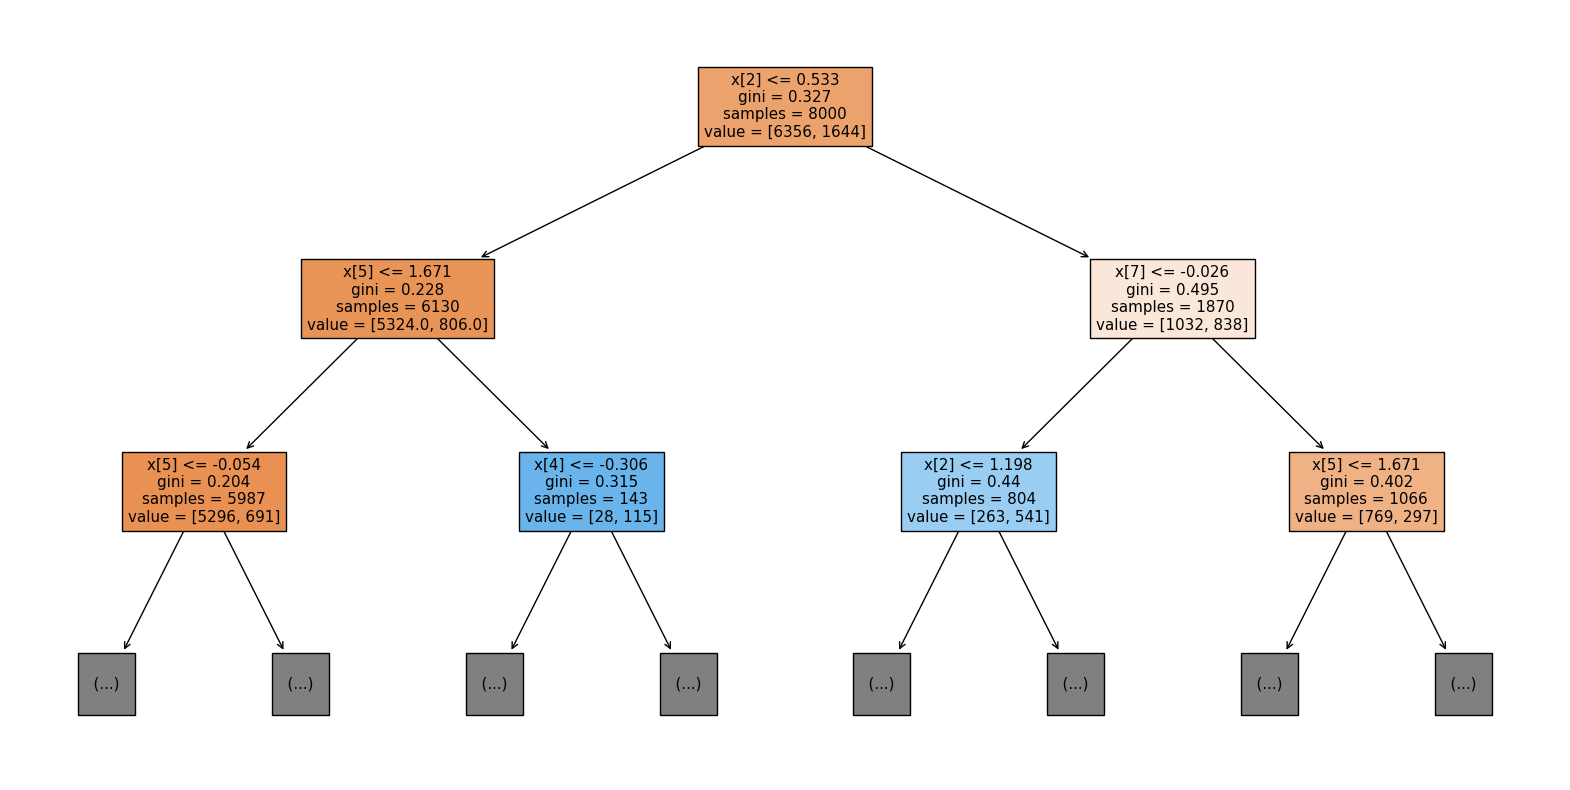

In [143]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model,filled=True,max_depth=2)
plt.show()

In [145]:
from sklearn import metrics
dt_Precision = metrics.precision_score(y_test, predict,average='weighted')
print(dt_Precision)

0.8321893286999119


In [147]:
dt_Sensitivity_recall = metrics.recall_score(y_test,predict,average='weighted')
print(dt_Sensitivity_recall)

0.8435


In [149]:
dt_F1_score = metrics.f1_score(y_test,predict,average='weighted')
print(dt_F1_score)

0.8354088551246748


In [151]:
dt_roc_auc = roc_auc_score(y_test,predict_proba, average='weighted', multi_class='ovr')
print(f'ROC-AUC Score: {dt_roc_auc}')

ROC-AUC Score: 0.7939802169579337


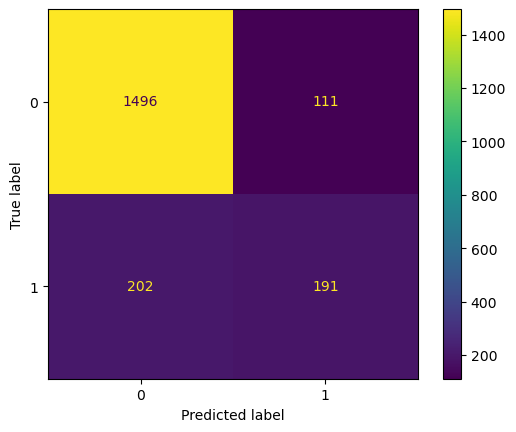

In [153]:
from sklearn import metrics
y_test = np.array(y_test) 
predict = np.array(predict)
confusion_matrix = metrics.confusion_matrix(y_test, predict)
classes = np.unique(y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                            display_labels=classes)
cm_display.plot()
plt.show()

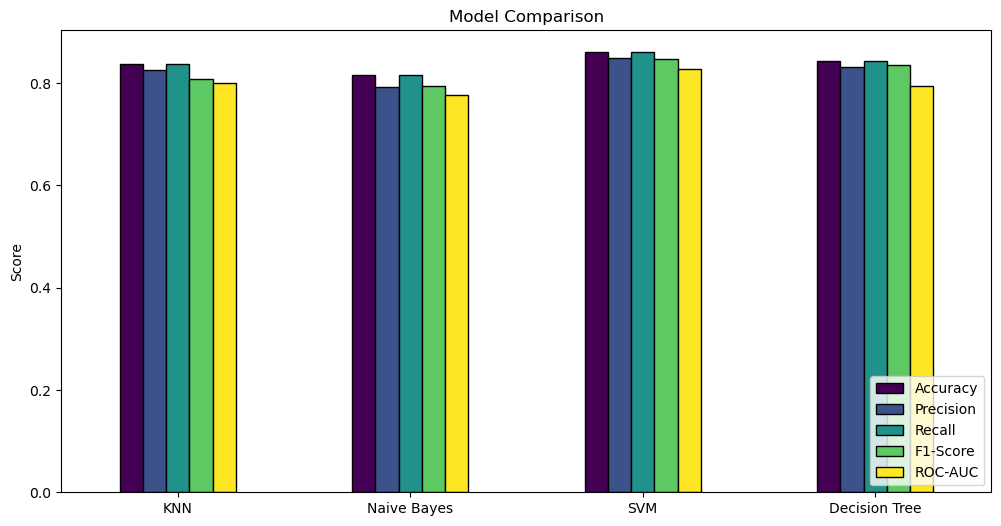

In [135]:
## Comparing Models
# Store results in a dictionary
import matplotlib.pyplot as plt
model_scores = {
    "KNN": [KNN_Accuracy, KNN_Precision, KNN_Sensitivity_recall, KNN_F1_score, KNN_roc_auc],
    
    "Naive Bayes": [nb_Accuracy, nb_Precision, nb_Sensitivity_recall, nb_F1_score, nb_roc_auc],
    
    "SVM": [SVM_Accuracy, SVM_Precision, SVM_Sensitivity_recall, SVM_F1_score, SVM_roc_auc],
    
    "Decision Tree": [dt_Accuracy, dt_Precision, dt_Sensitivity_recall, dt_F1_score, dt_roc_auc]
}

# Convert to DataFrame
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
df_scores = pd.DataFrame(model_scores, index=metrics)

# Plot the results
df_scores.T.plot(kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()